In [1]:
import numpy as np

In [2]:
import pandas

In [3]:
import matplotlib.pyplot as plt

In [4]:
from matplotlib.colors import ListedColormap

In [5]:
from copy import deepcopy

In [6]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pandas.read_csv(url, header=None)

In [8]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


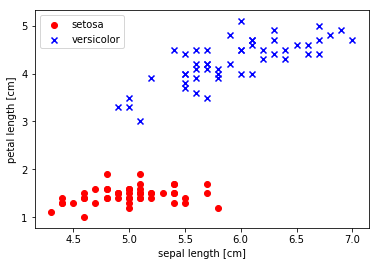

In [9]:
X = data.iloc[0:100, [0,2]].values
y = data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
plt.scatter(X[:50, 0], X[:50, 1], marker='o', color='red', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], marker='x', color='blue', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

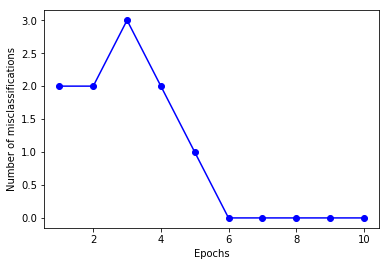

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(np.arange(1, ppn.n_iter+1, 1), ppn.errors_, marker='o', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
# plt.savefig('./figures/iris-misclassifications.png')
plt.show()

In [11]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ['x', 'o', 's', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'cyan', 'gray']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = np.min(X[:, 0]), np.max(X[:, 0])
    x2_min, x2_max = np.min(X[:, 1]), np.max(X[:, 1])
    xx1, xx2 = np.meshgrid(np.arange(x1_min-1, x1_max+1, resolution), np.arange(x2_min-1, x2_max+1, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], X[y == cl, 1], marker=markers[idx], color=cmap(idx), alpha=0.8, label=cl)

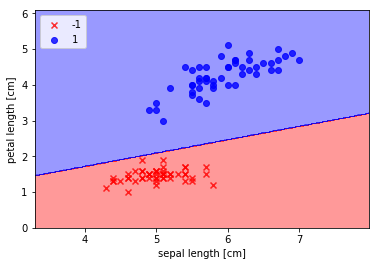

In [12]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
# plt.savefig('./figures/iris-decision-boundary.png')
plt.show()

In [13]:
class PerceptronEpochRecorder(Perceptron):   
    def return_weights(self, weights):
        return weights
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        self.epoch_weights = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            self.epoch_weights.append(deepcopy(self.w_))
        return self

In [14]:
def plot_weight_lines(index, weights):
    ax=plt.gca()
    if weights[1] == 0 or weights[2] != 0:
        slope = -(float(weights[1])/weights[2])
        if slope > 1 or slope < -1:
            annotate_multiple = 0.5
        else:
            annotate_multiple = 1
        plt.plot([ax.get_xlim()[0],ax.get_xlim()[1]], [slope*ax.get_xlim()[0]-float(weights[0])/weights[2], 
                                                       slope*ax.get_xlim()[1]-float(weights[0])/weights[2]],
                 color='red', linewidth=1.5, linestyle='--')
        plt.annotate(r'$'+str(index+1)+'$',
                     xy=(index*annotate_multiple, index*annotate_multiple*slope-float(weights[0])/weights[2]),
                     xycoords='data', xytext=(10,10), textcoords='offset points', fontsize=18,
                     arrowprops=dict(arrowstyle='-', connectionstyle="arc3,rad=.2"))
    else:
        plt.plot([0,0], [0, ax.get_ylim()[1]], color='red',
                 linewidth=1.5, linestyle='--')
        plt.annotate(r'$'+str(index+1)+'$', xy=(0, 0.5*ax.get_ylim()[1]), xycoords='data', xytext=(10,0),
                     textcoords='offset points',
                     fontsize=16, arrowprops=dict(arrowstyle='-', connectionstyle="arc3,rad=.2"))

In [15]:
ppnEpochRecorder = PerceptronEpochRecorder(eta=0.1, n_iter=10)
ppnEpochRecorder.fit(X, y)

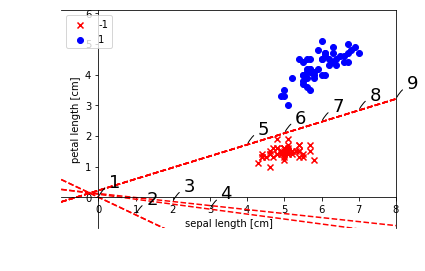

In [16]:
markers = ['x', 'o']
marker_colors = ['red', 'blue']
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(X[y==cl, 0], X[y==cl, 1], marker=markers[idx], color=marker_colors[idx], label=cl)
plt.legend(loc='upper left')
plt.xlim(-1, np.max(X[:,0]+1))
plt.ylim(-1, np.max(X[:,1]+1))
for idx, weights in enumerate(ppnEpochRecorder.epoch_weights):
    plot_weight_lines(idx, weights)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.xticks(np.arange(0,int(np.max(X[:,0]+2)),1))
plt.yticks(np.arange(0,int(np.max(X[:,1]+2)),1))
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.show()